# Grains dataset for Clustering analysis

Original dataset from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/seeds)
and reconfigured by DataCamp named [Grains](https://assets.datacamp.com/production/repositories/655/datasets/bb87f0bee2ac131042a01307f7d7e3d4a38d21ec/Grains.zip)

In [1]:
# Get dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('data/seeds.csv')

In [3]:
df.head()

,area,perimeter,compactness,length_kernel,width_kernel,asymmetry_coeff,length_groove,label,species
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,Kama wheat
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,Kama wheat
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,Kama wheat
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,Kama wheat
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,Kama wheat


In [4]:
samples = df.drop(['label','species'], axis=1).values

In [5]:
varieties = df['species'].values

## Examine optimal number of clusters

In [6]:
# Create array with values 1-6 and initiate blank array
ks = range(1,6)
inertias = []

In [7]:
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


([<matplotlib.axis.XTick at 0x118dd90c508>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

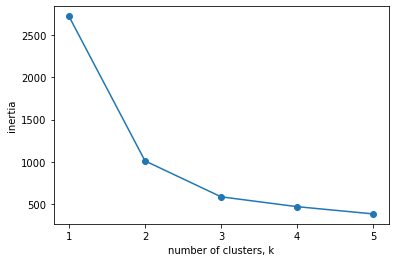

In [8]:
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)

We see that the inertia decreases very slowly from 3 clusters to 4 - this is where we see an "elbow". Therefore our optimal number of clusters is 3

# Evaluate the grain clustering using n_clusters=3

In [9]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

In [10]:
# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(samples)

In [11]:
# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

In [12]:
# Create crosstab: ct
ct = pd.crosstab( df['labels'], df['varieties'])

In [13]:
ct

varieties,Canadian wheat,Kama wheat,Rosa wheat
labels,,,
0,68,9,0
1,2,60,10
2,0,1,60


## Hierarchical clustering of the grain data

In [14]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

In [15]:
# Calculate the linkage: mergings
mergings = linkage(samples, method='complete')

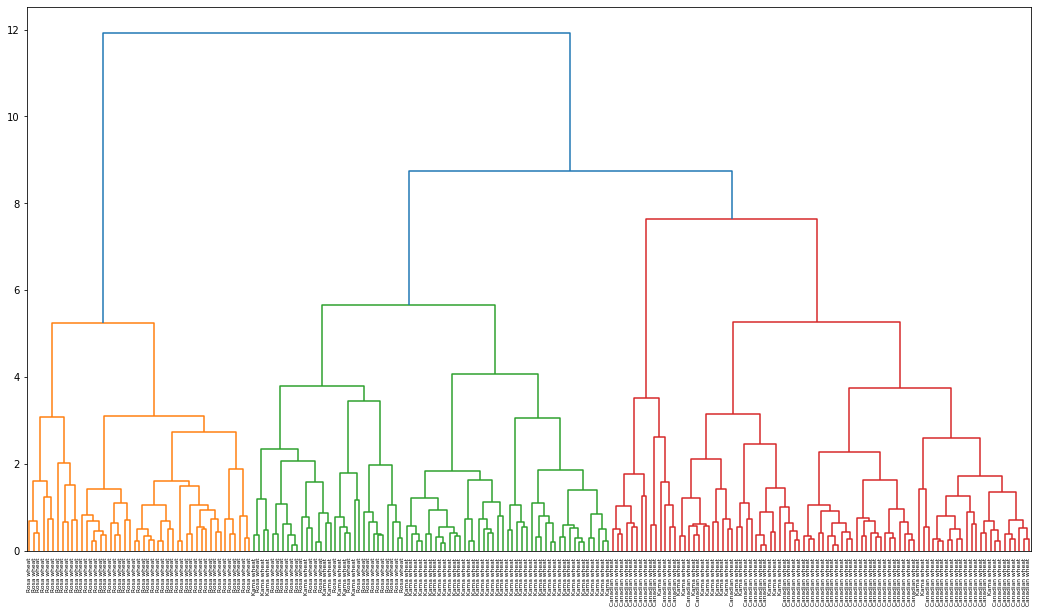

In [21]:
# Plot the dendrogram, using varieties as labels
fig, ax = plt.subplots(figsize=(18,10))
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
           ax=ax
)
plt.show()

## Extract cluster labels at a height of '6'

In [22]:
# Import dependencies
from scipy.cluster.hierarchy import fcluster

In [23]:
# Use fcluster to extract labels: labels
f_labels = fcluster(mergings, 6, criterion='distance')

In [24]:
# Create a DataFrame with labels and varieties as columns to pass to a crosstab
df = pd.DataFrame({'f_labels': f_labels, 'varieties': varieties})
ct = pd.crosstab(df['f_labels'], df['varieties'])
ct

varieties,Canadian wheat,Kama wheat,Rosa wheat
f_labels,,,
1,0,0,47
2,0,52,23
3,13,1,0
4,57,17,0


# Principle component analysis (PCA) 

First we want to visualize the correlation before we do PCA

In [25]:
# Import dependencies
from scipy.stats import pearsonr

In [28]:
# Assign the 0th column of grains: width
width = samples[:,3]

# Assign the 1st column of grains: length
length = samples[:,4]

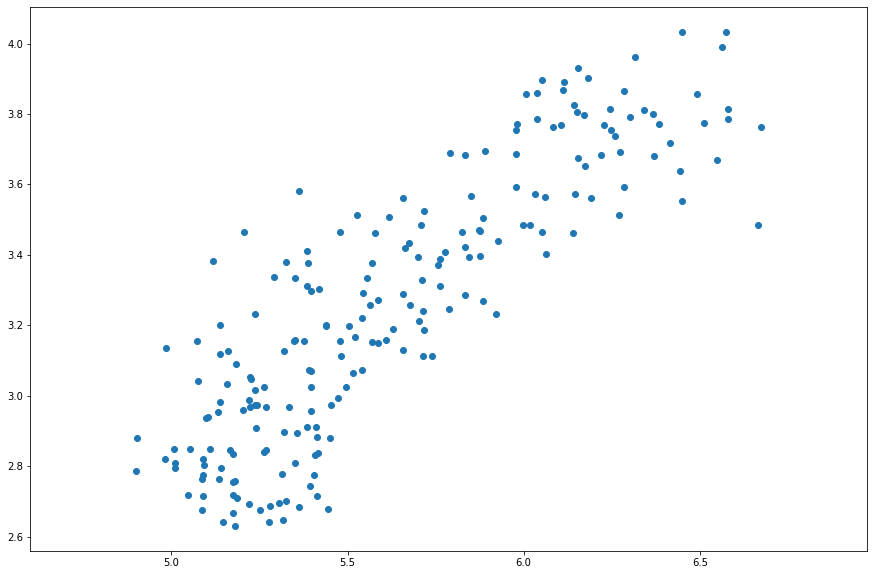

In [30]:
# Scatter plot width vs length
fig, ax = plt.subplots(figsize=(15,10))
plt.scatter(width, length)
plt.axis('equal')
plt.show()

In [31]:
# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width, length)

# Display the correlation
print(correlation)

0.8604149377143466


## Apply PCA and plot out the width vs. length decorrelated measurements

In [32]:
# Import PCA
from sklearn.decomposition import PCA

In [34]:
# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(samples)

In [35]:
# Assign 0th column of pca_features: xs
xs = pca_features[:,3]

# Assign 1st column of pca_features: ys
ys = pca_features[:,4]

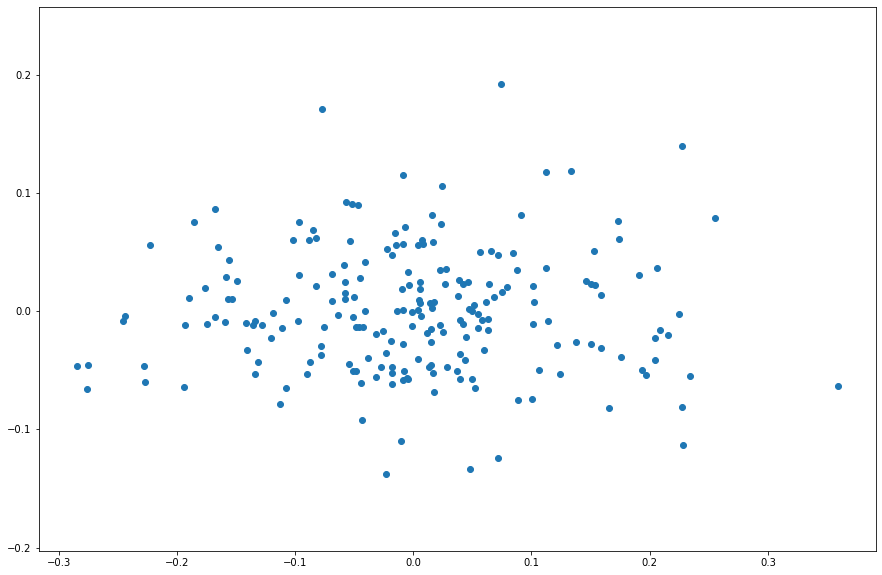

In [36]:
# Scatter plot xs vs ys
fig, ax = plt.subplots(figsize=(15,10))
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

In [37]:
# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

-1.491862189340054e-16


### Comparing the two pearsons correlation coefficients we can clearly see the width/length has been decorrelated after the PCA treatment